### 不同极化方向的反射系数

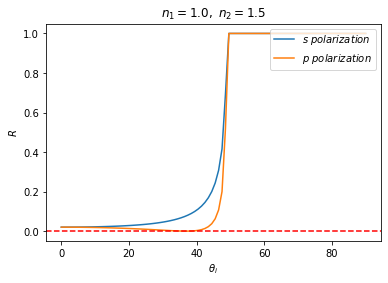

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# fixme: 数据
n1 = 1.33    # air
n2 = 1.0    # glass
theta_i = np.linspace(0, 90, 90)
cos_theta_i = np.cos(np.deg2rad(theta_i))
sin_theta_i = np.sin(np.deg2rad(theta_i))
cos_theta_t = np.sqrt(np.maximum(0.0, 1 - (n1 / n2 * sin_theta_i) ** 2))
r_s = np.abs((n1 * cos_theta_i - n2 * cos_theta_t) /
             (n1 * cos_theta_i + n2 * cos_theta_t)) ** 2
r_p = np.abs((n1 * cos_theta_t - n2 * cos_theta_i) /
             (n1 * cos_theta_t + n2 * cos_theta_i)) ** 2

# 准备画图
fig = plt.figure()
ax = fig.add_subplot(111)

# fixme: 画图
ax.plot(theta_i, r_s, label=r"$s\ polarization$")
ax.plot(theta_i, r_p, label=r"$p\ polarization$")

# fixme: 标题
ax.set_title(r"$n_1 = 1.0,\ n_2 = 1.5$")

# fixme: 横纵坐标
ax.set_xlabel(r"$\theta_i$")
ax.set_ylabel(r"$R$")

# fixme: 显示图例
plt.legend(loc='upper right')

ax.axhline(0, ls="--", color="r")

### 从空气入射到水中，平均反射率（Fresnel）

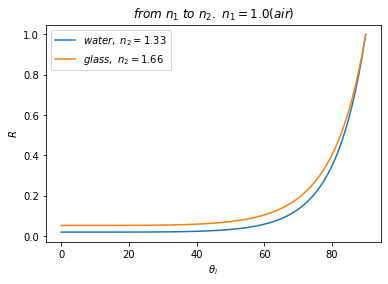

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def fresnel(n1, n2, theta_i):
    """Fresnel equation，接收角度值输入，从 n1 入射到 n2"""
    sin_theta_i = np.sin(np.deg2rad(theta_i))
    cos_theta_i = np.cos(np.deg2rad(theta_i))
    sin_theta_t = np.minimum(1.0, n1 / n2 * sin_theta_i)
    cos_theta_t = np.sqrt(1 - sin_theta_t ** 2)

    rs = ((n1 * cos_theta_i - n2 * cos_theta_t) /
          (n1 * cos_theta_i + n2 * cos_theta_t)) ** 2
    rp = ((n1 * cos_theta_t - n2 * cos_theta_i) /
          (n1 * cos_theta_t + n2 * cos_theta_i)) ** 2

    return rs, rp

# 从空气入射到水中
theta_i = np.linspace(0, 90, 90)
n1 = 1.0
n2_water = 1.33
n2_glass = 1.6

rs_water, rp_water = fresnel(n1, n2_water, theta_i)
rs_glass, rp_glass = fresnel(n1, n2_glass, theta_i)

# 准备画图
fig = plt.figure()
ax = fig.add_subplot(111)

# fixme: 画图
ax.plot(theta_i, (rs_water + rp_water) / 2, label=r"$water,\ n_2 = 1.33$")
ax.plot(theta_i, (rs_glass + rp_glass) / 2, label=r"$glass,\ n_2 = 1.66$")

# fixme: 标题
ax.set_title(r"$from\ n_1\ to\ n_2.\ n_1 = 1.0(air)$")

# fixme: 横纵坐标
ax.set_xlabel(r"$\theta_i$")
ax.set_ylabel(r"$R$")

# fixme: 显示图例
plt.legend(loc='upper left')

### 从水中入射到空气中，反射率（Fresnel）

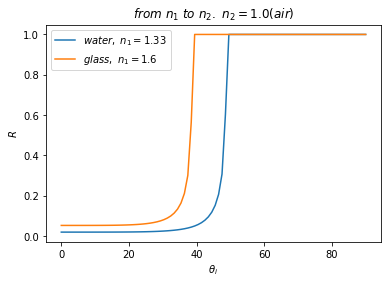

In [8]:
import numpy as np
import matplotlib.pyplot as plt


def fresnel(n1, n2, theta_i):
    """Fresnel equation，接收角度值输入，从 n1 入射到 n2"""
    sin_theta_i = np.sin(np.deg2rad(theta_i))
    cos_theta_i = np.cos(np.deg2rad(theta_i))
    sin_theta_t = np.minimum(1.0, n1 / n2 * sin_theta_i)
    cos_theta_t = np.sqrt(1 - sin_theta_t ** 2)

    rs = ((n1 * cos_theta_i - n2 * cos_theta_t) /
          (n1 * cos_theta_i + n2 * cos_theta_t)) ** 2
    rp = ((n1 * cos_theta_t - n2 * cos_theta_i) /
          (n1 * cos_theta_t + n2 * cos_theta_i)) ** 2

    return rs, rp

# 从水入射到空气中
theta_i = np.linspace(0, 90, 90)
n2 = 1.0
n1_water = 1.33
n1_glass = 1.6

rs_water, rp_water = fresnel(n1_water, n2, theta_i)
rs_glass, rp_glass = fresnel(n1_glass, n2, theta_i)

# 准备画图
fig = plt.figure()
ax = fig.add_subplot(111)

# fixme: 画图
ax.plot(theta_i, (rs_water + rp_water) / 2, label=r"$water,\ n_1 = 1.33$")
ax.plot(theta_i, (rs_glass + rp_glass) / 2, label=r"$glass,\ n_1 = 1.6$")

# fixme: 标题
ax.set_title(r"$from\ n_1\ to\ n_2.\ n_2 = 1.0(air)$")

# fixme: 横纵坐标
ax.set_xlabel(r"$\theta_i$")
ax.set_ylabel(r"$R$")

# fixme: 显示图例
plt.legend(loc='upper left')

### schlick：空气入射到绝缘体

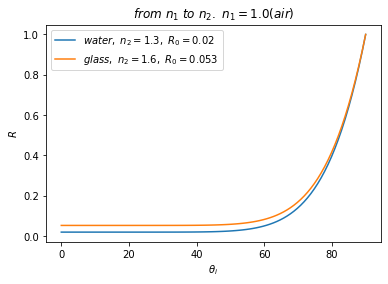

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def schlick(n1, n2, theta_i):
    """接收角度值，从 n1 入射到 n2"""
    r0 = np.power((n1 - n2) / (n1 + n2), 2)
    theta_i = np.deg2rad(theta_i)
    r = r0 + (1 - r0) * np.power(1 - np.cos(theta_i), 5)
    return r0, r

# 从空气入射到绝缘体
n1_air = 1.0
n2_water = 1.33
n2_glass = 1.6
theta_i = np.linspace(0, 90, 90)

r0_water, r_water = schlick(n1_air, n2_water, theta_i)
r0_glass, r_glass = schlick(n1_air, n2_glass, theta_i)

# 准备画图
fig = plt.figure()
ax = fig.add_subplot(111)

# fixme: 画图
ax.plot(theta_i, r_water, label="$water,\ n_2 = {:.2},\ R_0 = {:.2}$".format(
    n2_water, r0_water))
ax.plot(theta_i, r_glass, label="$glass,\ n_2 = {:.2},\ R_0 = {:.2}$".format(
    n2_glass, r0_glass))

# fixme: 标题
ax.set_title(r"$from\ n_1\ to\ n_2.\ n_1 = 1.0(air)$")

# fixme: 横纵坐标
ax.set_xlabel(r"$\theta_i$")
ax.set_ylabel(r"$R$")

# fixme: 显示图例
plt.legend(loc='upper left')

### schlick：不同金属的反射率

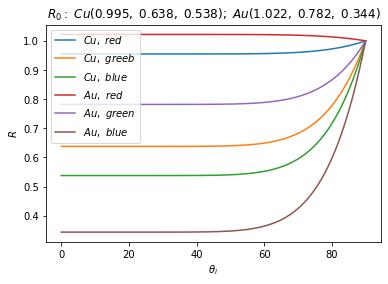

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def schlick2(r0, theta_i):
    """接收基础反射系数和入射角度值"""
    theta_i = np.deg2rad(theta_i)
    temp = np.power(1 - np.cos(theta_i), 5)
    r_r = r0[0] + (1 - r0[0]) * temp
    r_g = r0[1] + (1 - r0[1]) * temp
    r_b = r0[2] + (1 - r0[2]) * temp
    return r_r, r_g, r_b

# 金属的反射系数
r0_cu = (0.955, 0.638, 0.538)
r0_au = (1.022, 0.782, 0.344)
theta_i = np.linspace(0, 90, 90)

r_cu_r, r_cu_g, r_cu_b = schlick2(r0_cu, theta_i)
r_au_r, r_au_g, r_au_b = schlick2(r0_au, theta_i)

# 准备画图
fig = plt.figure()
ax = fig.add_subplot(111)

# fixme: 画图
ax.plot(theta_i, r_cu_r, label="$Cu,\ red$")
ax.plot(theta_i, r_cu_g, label="$Cu,\ greeb$")
ax.plot(theta_i, r_cu_b, label="$Cu,\ blue$")

ax.plot(theta_i, r_au_r, label="$Au,\ red$")
ax.plot(theta_i, r_au_g, label="$Au,\ green$")
ax.plot(theta_i, r_au_b, label="$Au,\ blue$")

# fixme: 标题
ax.set_title(
    "$R_0:\ Cu(0.995,\ 0.638,\ 0.538);\ Au(1.022,\ 0.782,\ 0.344)$")

# fixme: 横纵坐标
ax.set_xlabel(r"$\theta_i$")
ax.set_ylabel(r"$R$")

# fixme: 显示图例
plt.legend(loc='upper left')